In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Leer el archivo
df = pd.read_csv('Admision 2026_con_promedio.csv', sep=';')
print(f"✓ Archivo cargado: {len(df):,} filas totales")

# Aplicar filtros
df_filtrado = df[
    (df['RAMA_EDUCACIONAL'] == 'H1') & 
    (df['SITUACION_EGRESO'] == 1) &
    (df['promedio PAES'].notna()) &  # Excluir valores en blanco/nulos
    (df['promedio PAES'] > 0)
].copy()

print(f"✓ Estudiantes después de filtros: {len(df_filtrado):,}")

✓ Archivo cargado: 306,022 filas totales
✓ Estudiantes después de filtros: 132,039


In [3]:
ranking = df_filtrado.groupby('RBD').agg({
    'promedio PAES': ['mean', 'count', 'std', 'min', 'max']
}).round(2)

ranking.columns = ['Promedio_PAES', 'N_Estudiantes', 'Desv_Std', 'Min_PAES', 'Max_PAES']
ranking = ranking.reset_index()
ranking = ranking.sort_values('Promedio_PAES', ascending=False)
ranking.insert(0, 'Ranking', range(1, len(ranking) + 1))

print(f"\n✓ Ranking creado con {len(ranking):,} colegios")

# Guardar ranking
ranking.to_csv('Ranking_Colegios_PAES.csv', index=False, sep=';')



✓ Ranking creado con 2,410 colegios


In [4]:
print("\n" + "="*80)
print("TOP 20 COLEGIOS CON MEJOR PROMEDIO PAES")
print("="*80)
display(ranking.head(124))


TOP 20 COLEGIOS CON MEJOR PROMEDIO PAES


,Ranking,RBD,Promedio_PAES,N_Estudiantes,Desv_Std,Min_PAES,Max_PAES
935,1,8998.0,893.42,30,54.73,735.0,994.5
897,2,8902.0,887.43,69,77.41,617.0,981.5
881,3,8868.0,870.91,49,67.79,674.5,981.5
878,4,8862.0,870.12,101,72.40,628.5,994.5
1834,5,20311.0,867.34,35,69.14,632.5,948.0
...,...,...,...,...,...,...,...
2160,120,25669.0,779.68,41,86.31,570.5,968.5
1403,121,13319.0,778.86,43,99.46,533.0,935.5
241,122,1791.0,778.35,53,105.99,484.5,958.0
737,123,7700.0,777.09,97,95.97,513.5,969.0


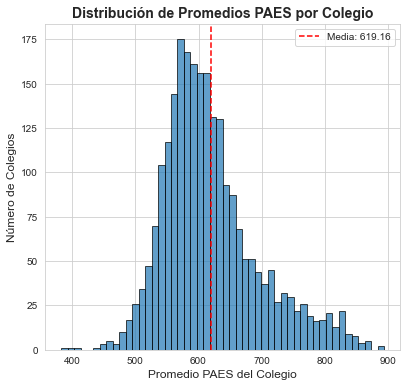

In [5]:
# Gráfico 1: Distribución del Promedio PAES por colegio
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(ranking['Promedio_PAES'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Promedio PAES del Colegio', fontsize=12)
plt.ylabel('Número de Colegios', fontsize=12)
plt.title('Distribución de Promedios PAES por Colegio', fontsize=14, fontweight='bold')
plt.axvline(ranking['Promedio_PAES'].mean(), color='red', linestyle='--', 
            label=f'Media: {ranking["Promedio_PAES"].mean():.2f}')
plt.legend()

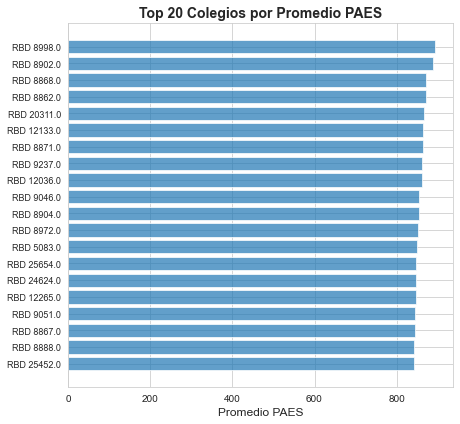

In [6]:

# Gráfico 2: Top 20 colegios
plt.subplot(1, 2, 2)
top_20 = ranking.head(20).copy()
plt.barh(range(len(top_20)), top_20['Promedio_PAES'], alpha=0.7)
plt.yticks(range(len(top_20)), [f"RBD {rbd}" for rbd in top_20['RBD']], fontsize=9)
plt.xlabel('Promedio PAES', fontsize=12)
plt.title('Top 20 Colegios por Promedio PAES', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

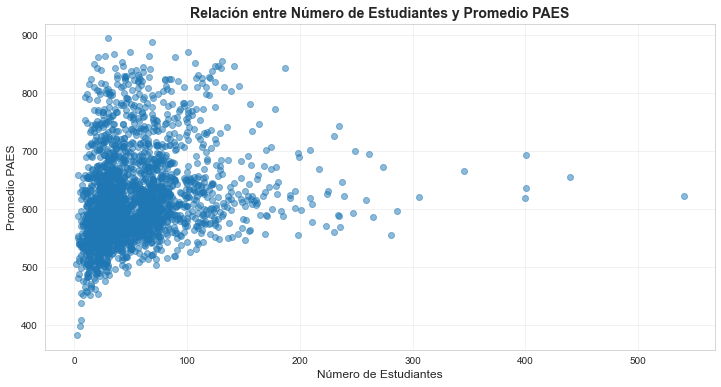

In [7]:
# Gráfico 3: Relación entre número de estudiantes y promedio
plt.figure(figsize=(12, 6))
plt.scatter(ranking['N_Estudiantes'], ranking['Promedio_PAES'], alpha=0.5)
plt.xlabel('Número de Estudiantes', fontsize=12)
plt.ylabel('Promedio PAES', fontsize=12)
plt.title('Relación entre Número de Estudiantes y Promedio PAES', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

In [8]:
print("\n" + "="*80)
print("ESTADÍSTICAS DEL RANKING")
print("="*80)
print(ranking[['Promedio_PAES', 'N_Estudiantes', 'Desv_Std']].describe())


ESTADÍSTICAS DEL RANKING
       Promedio_PAES  N_Estudiantes     Desv_Std
count    2410.000000    2410.000000  2409.000000
mean      619.156402      54.787967   113.506725
std        76.471378      43.794070    19.082092
min       382.750000       1.000000    42.730000
25%       567.565000      26.000000   101.840000
50%       604.655000      43.000000   113.410000
75%       654.095000      71.000000   124.770000
max       893.420000     541.000000   225.920000


In [9]:
# Colegios con más de 50 estudiantes
print("\n" + "="*80)
print("TOP 10 COLEGIOS GRANDES (>50 estudiantes)")
print("="*80)
colegios_grandes = ranking[ranking['N_Estudiantes'] > 50].head(80)
display(colegios_grandes)



TOP 10 COLEGIOS GRANDES (>50 estudiantes)


,Ranking,RBD,Promedio_PAES,N_Estudiantes,Desv_Std,Min_PAES,Max_PAES
897,2,8902.0,887.43,69,77.41,617.0,981.5
878,4,8862.0,870.12,101,72.40,628.5,994.5
884,7,8871.0,862.80,66,85.86,518.0,981.5
983,8,9237.0,861.42,89,76.48,606.0,981.5
945,10,9046.0,855.34,131,85.13,564.5,969.0
...,...,...,...,...,...,...,...
2184,132,25749.0,772.55,178,94.83,474.0,958.0
2041,133,25055.0,772.09,94,126.18,341.0,987.5
2220,134,25961.0,771.98,114,105.41,309.5,969.0
988,136,9250.0,771.16,108,93.32,515.5,969.0


In [10]:
# Ver los primeros 10 RBDs
print(ranking[['RBD', 'Promedio_PAES']].head(10))

          RBD  Promedio_PAES
935    8998.0         893.42
897    8902.0         887.43
881    8868.0         870.91
878    8862.0         870.12
1834  20311.0         867.34
1307  12133.0         863.24
884    8871.0         862.80
983    9237.0         861.42
1295  12036.0         860.76
945    9046.0         855.34


In [11]:
# Buscar directamente en el ranking
ranking[ranking['RBD'] == '7700']

,Ranking,RBD,Promedio_PAES,N_Estudiantes,Desv_Std,Min_PAES,Max_PAES


In [12]:
# Ver los primeros 20 RBDs del ranking
print(ranking[['Ranking', 'RBD', 'Promedio_PAES', 'N_Estudiantes']].head(309))

      Ranking      RBD  Promedio_PAES  N_Estudiantes
935         1   8998.0         893.42             30
897         2   8902.0         887.43             69
881         3   8868.0         870.91             49
878         4   8862.0         870.12            101
1834        5  20311.0         867.34             35
...       ...      ...            ...            ...
2224      305  26001.0         711.27            114
1888      306  22351.0         710.92             78
2403      307  41780.0         710.89             33
424       308   3433.0         710.88             33
1724      309  17750.0         710.72             72

[309 rows x 4 columns]


In [13]:
def buscar_colegio(rbd):
    """Busca un colegio por RBD"""
    
    # Convertir a float para comparar
    try:
        rbd_num = float(rbd)
    except:
        rbd_num = rbd
    
    # Buscar en el ranking
    resultado = ranking[ranking['RBD'] == rbd_num]
    
    if len(resultado) == 0:
        print(f"\n❌ No se encontró el colegio con RBD: {rbd}")
        return None
    
    info = resultado.iloc[0]
    
    # Mostrar información
    print("\n" + "="*80)
    print(f"🏫 COLEGIO RBD: {int(info['RBD'])}")
    print("="*80)
    print(f"🏆 RANKING: #{int(info['Ranking'])} de {len(ranking):,} colegios")
    print(f"📊 Promedio PAES: {info['Promedio_PAES']:.2f} puntos")
    print(f"👥 Estudiantes evaluados: {int(info['N_Estudiantes'])}")
    print(f"📈 Desviación estándar: {info['Desv_Std']:.2f}")
    print(f"📉 Puntaje mínimo: {info['Min_PAES']:.2f}")
    print(f"📈 Puntaje máximo: {info['Max_PAES']:.2f}")
    
    # Percentil
    percentil = (info['Ranking'] / len(ranking)) * 100
    print(f"\n📍 Este colegio está en el Top {percentil:.1f}%")
    
    # Comparación
    promedio_general = ranking['Promedio_PAES'].mean()
    diferencia = info['Promedio_PAES'] - promedio_general
    
    print(f"\n📊 Promedio general: {promedio_general:.2f}")
    if diferencia > 0:
        print(f"✅ Este colegio está {diferencia:.2f} puntos SOBRE el promedio")
    else:
        print(f"⚠️  Este colegio está {abs(diferencia):.2f} puntos BAJO el promedio")
    
    # Contexto en el ranking
    print(f"\n🔍 COLEGIOS CERCANOS EN EL RANKING:")
    print("-" * 80)
    
    pos = int(info['Ranking']) - 1
    inicio = max(0, pos - 3)
    fin = min(len(ranking), pos + 4)
    
    contexto = ranking.iloc[inicio:fin][['Ranking', 'RBD', 'Promedio_PAES', 'N_Estudiantes']].copy()
    
    for idx, row in contexto.iterrows():
        if row['RBD'] == rbd_num:
            print(f">>> {int(row['Ranking'])}. RBD {int(row['RBD'])} - {row['Promedio_PAES']:.2f} ({int(row['N_Estudiantes'])} est.) <<<")
        else:
            print(f"    {int(row['Ranking'])}. RBD {int(row['RBD'])} - {row['Promedio_PAES']:.2f} ({int(row['N_Estudiantes'])} est.)")
    
    print("="*80)
    
    return info

print("✅ Función buscar_colegio() actualizada correctamente")

✅ Función buscar_colegio() actualizada correctamente


In [15]:
buscar_colegio('7435')


🏫 COLEGIO RBD: 7435
🏆 RANKING: #137 de 2,410 colegios
📊 Promedio PAES: 770.09 puntos
👥 Estudiantes evaluados: 56
📈 Desviación estándar: 120.12
📉 Puntaje mínimo: 452.50
📈 Puntaje máximo: 958.00

📍 Este colegio está en el Top 5.7%

📊 Promedio general: 619.16
✅ Este colegio está 150.93 puntos SOBRE el promedio

🔍 COLEGIOS CERCANOS EN EL RANKING:
--------------------------------------------------------------------------------
    134. RBD 25961 - 771.98 (114 est.)
    135. RBD 8981 - 771.76 (36 est.)
    136. RBD 9250 - 771.16 (108 est.)
>>> 137. RBD 7435 - 770.09 (56 est.) <<<
    138. RBD 24985 - 769.93 (21 est.)
    139. RBD 12087 - 769.67 (101 est.)
    140. RBD 1787 - 769.56 (17 est.)


Ranking           137.00
RBD              7435.00
Promedio_PAES     770.09
N_Estudiantes      56.00
Desv_Std          120.12
Min_PAES          452.50
Max_PAES          958.00
Name: 725, dtype: float64